In [1]:
# Importamos las librerías necesarias para análisis y visualización de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leemos el archivo CSV con los datos de las canciones
df = pd.read_csv("tracks_features.csv")

In [3]:
# Mostramos el DataFrame para ver una vista previa de los datos
df

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


Limpieza de datos

In [4]:
# Revisamos la cantidad de valores nulos por columna, ordenados de mayor a menor
df.isnull().sum().sort_values(ascending=False)

album               11
name                 3
id                   0
album_id             0
artists              0
artist_ids           0
track_number         0
disc_number          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
year                 0
release_date         0
dtype: int64

In [5]:
# Eliminamos las filas donde el año es menor o igual a 0 (datos inválidos)
df = df[df["year"]>0]

In [6]:
# Eliminamos las filas donde la duración es menor o igual a 0 (datos inválidos)
df = df[df["duration_ms"]>0]

In [7]:
# Convertimos la columna de fecha de lanzamiento a tipo datetime, forzando errores a NaT
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

In [8]:
# Eliminamos filas con valores nulos en las columnas clave: álbum, nombre y fecha de lanzamiento
df = df.dropna(subset=["album", "name", "release_date"])

Seleccionamos las columnas que nos interesan

In [9]:
# Seleccionamos solo las columnas relevantes para el análisis y creamos una copia
df_filtrado = df[['id', 'name', 'album', 'artists', 'track_number', 'disc_number', 'explicit', 'danceability', 
                          'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                          'duration_ms', 'time_signature', 'year', 'release_date']].copy()

¿Las canciones actuales son más cortas que antes?

In [10]:
# Convertimos la duración de milisegundos a minutos y redondeamos a 2 decimales
df_filtrado["duration_min"] = (df_filtrado["duration_ms"] / 60000).round(2)

In [11]:
# Eliminamos la columna de duración en milisegundos, ya que ahora tenemos la duración en minutos
df_filtrado.drop(columns=["duration_ms"], inplace=True)

In [12]:
# Mostramos el DataFrame filtrado para verificar los cambios
df_filtrado

,id,name,album,artists,track_number,disc_number,explicit,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,release_date,duration_min
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],1,1,False,0.470,0.978,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4.0,1999,1999-11-02,3.50
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],2,1,True,0.599,0.957,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4.0,1999,1999-11-02,3.44
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],3,1,False,0.315,0.970,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4.0,1999,1999-11-02,4.98
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],4,1,True,0.440,0.967,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4.0,1999,1999-11-02,3.56
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],5,1,False,0.426,0.929,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4.0,1999,1999-11-02,3.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,['FVLCRVM'],2,1,False,0.264,0.966,0.0672,0.00935,0.002240,0.3370,0.415,159.586,4.0,2014,2014-01-09,4.60
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,['FVLCRVM'],3,1,False,0.796,0.701,0.0883,0.10400,0.644000,0.0749,0.781,121.980,4.0,2014,2014-01-09,6.05
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,['FVLCRVM'],4,1,False,0.785,0.796,0.0564,0.03040,0.918000,0.0664,0.467,121.996,4.0,2014,2014-01-09,6.42
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,['FVLCRVM'],5,1,False,0.665,0.856,0.0409,0.00007,0.776000,0.1170,0.227,124.986,4.0,2014,2014-01-09,5.41


In [13]:
# Calculamos la duración promedio de las canciones por año
duracion_por_anio = df_filtrado.groupby("year")["duration_min"].mean().reset_index()

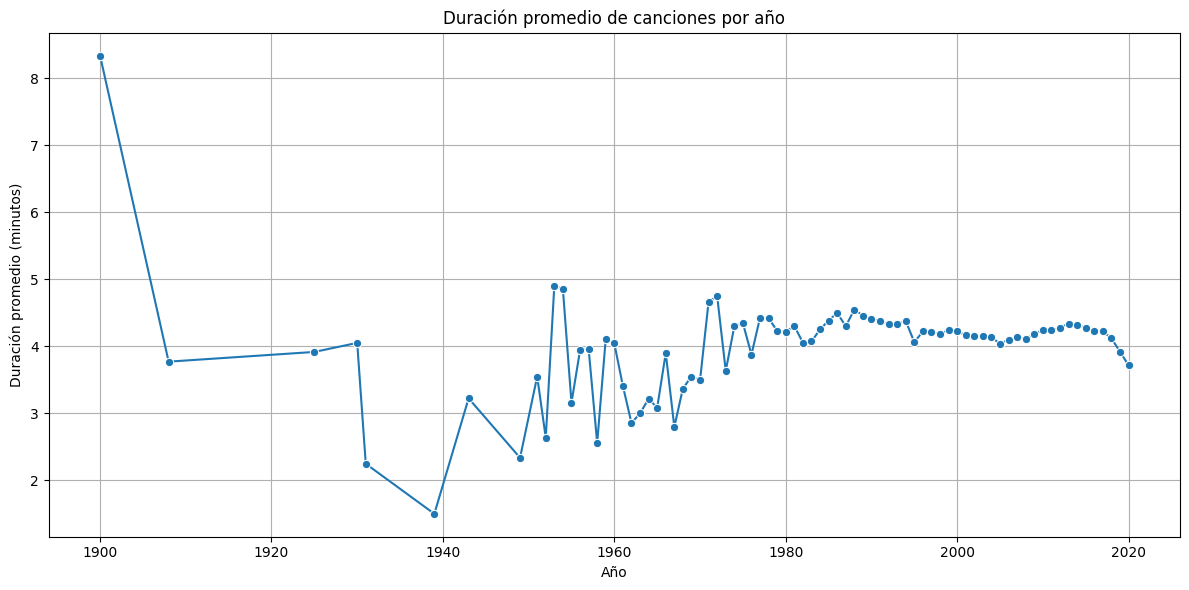

In [14]:
# Graficamos la duración promedio de las canciones por año
plt.figure(figsize=(12, 6))
sns.lineplot(data=duracion_por_anio, x="year", y="duration_min", marker="o")
plt.title("Duración promedio de canciones por año")
plt.xlabel("Año")
plt.ylabel("Duración promedio (minutos)")
plt.grid(True)
plt.tight_layout()
plt.show()

¿La música es más alegre o triste con el tiempo?

In [15]:
# Calculamos el valence promedio (alegría/tristeza) por año
valence = df_filtrado.groupby("year")["valence"].mean().reset_index()

In [16]:
# Mostramos el DataFrame con el valence promedio por año
valence

,year,valence
0,1900,0.422157
1,1908,0.657000
2,1925,0.148969
3,1930,0.428240
4,1931,0.721267
...,...,...
73,2016,0.405508
74,2017,0.394434
75,2018,0.404680
76,2019,0.410156


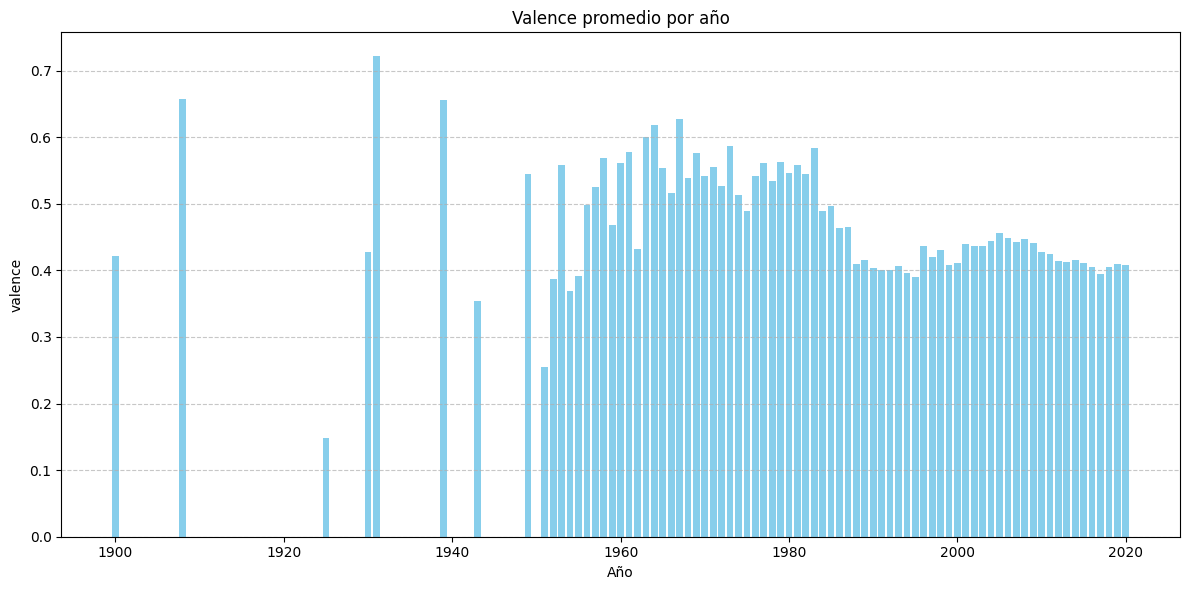

In [17]:
# Graficamos el valence promedio por año
plt.figure(figsize=(12, 6))
plt.bar(valence["year"], valence["valence"], color='skyblue')
plt.title("Valence promedio por año")
plt.xlabel("Año")
plt.ylabel("valence")
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

¿Qué tan acústica, instrumental o hablada es la música actual?

In [18]:
# Definimos las características acústicas a analizar
caracteristicas = ['danceability', 'energy', 'acousticness',
                   'instrumentalness', 'liveness', 'speechiness', 'valence']

In [19]:
# Calculamos el promedio anual de cada característica acústica
caracteristicas_acusticas = df_filtrado.groupby("year")[caracteristicas].mean().reset_index()

In [20]:
# Mostramos el DataFrame con las características acústicas promedio por año
caracteristicas_acusticas

,year,danceability,energy,acousticness,instrumentalness,liveness,speechiness,valence
0,1900,0.483857,0.282193,0.713071,7.369286e-01,0.129264,0.051693,0.422157
1,1908,0.604105,0.473695,0.410932,7.279444e-03,0.187263,0.076395,0.657000
2,1925,0.314312,0.129225,0.945562,8.382219e-02,0.195250,0.084100,0.148969
3,1930,0.376000,0.391000,0.406704,1.308528e-02,0.146420,0.035980,0.428240
4,1931,0.682933,0.315400,0.889800,8.400000e-07,0.758933,0.641000,0.721267
...,...,...,...,...,...,...,...,...
73,2016,0.495121,0.547475,0.395727,2.963131e-01,0.194840,0.078719,0.405508
74,2017,0.495305,0.545376,0.392430,2.915533e-01,0.200291,0.083484,0.394434
75,2018,0.517192,0.569575,0.354891,2.699430e-01,0.197254,0.088290,0.404680
76,2019,0.532340,0.584655,0.325646,2.508242e-01,0.202266,0.100423,0.410156


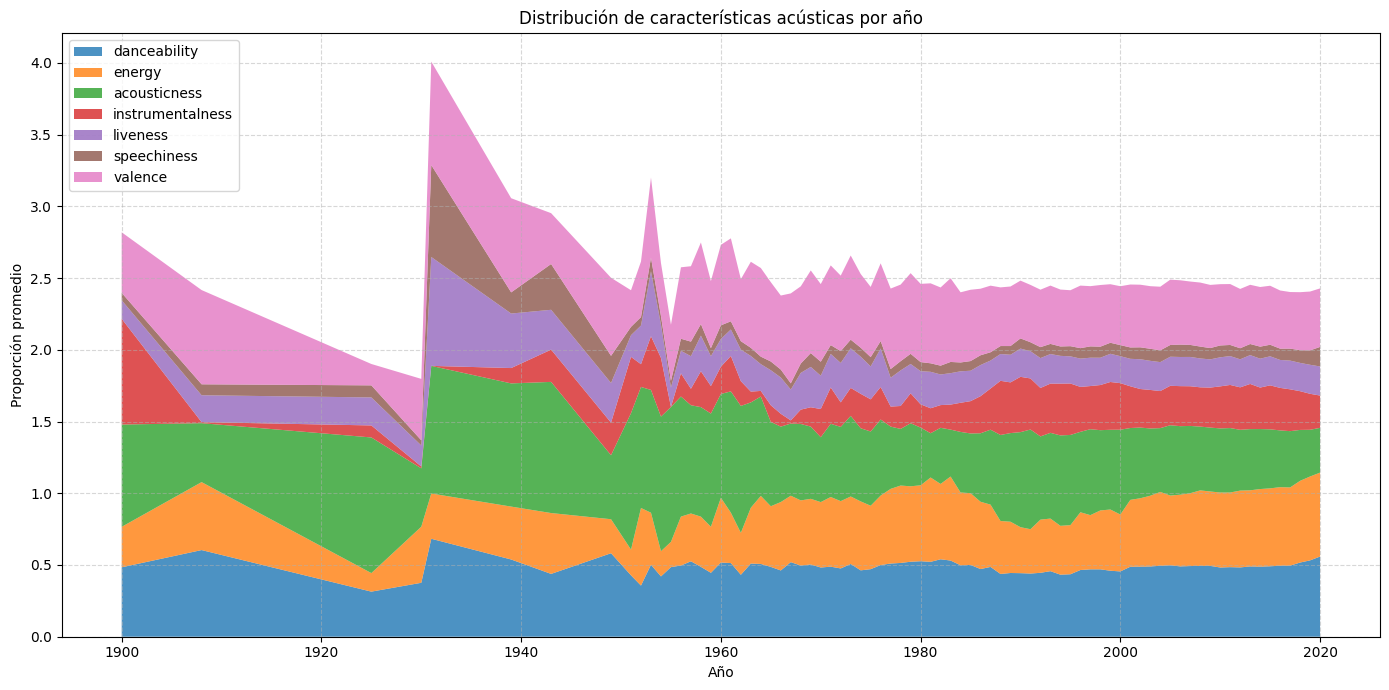

In [21]:
# Graficamos la evolución de las características acústicas por año usando un gráfico de área apilado
plt.figure(figsize=(14, 7))

plt.stackplot(caracteristicas_acusticas["year"],
              [caracteristicas_acusticas[col] for col in caracteristicas],
              labels=caracteristicas, alpha=0.8)

plt.title("Distribución de características acústicas por año")
plt.xlabel("Año")
plt.ylabel("Proporción promedio")
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

¿Las canciones ahora suenan con más fuerza?

In [22]:
# Calculamos la energía promedio de las canciones por año
energia = df_filtrado.groupby("year")['energy'].mean().reset_index()

In [23]:
# Mostramos el DataFrame con la energía promedio por año
energia

,year,energy
0,1900,0.282193
1,1908,0.473695
2,1925,0.129225
3,1930,0.391000
4,1931,0.315400
...,...,...
73,2016,0.547475
74,2017,0.545376
75,2018,0.569575
76,2019,0.584655


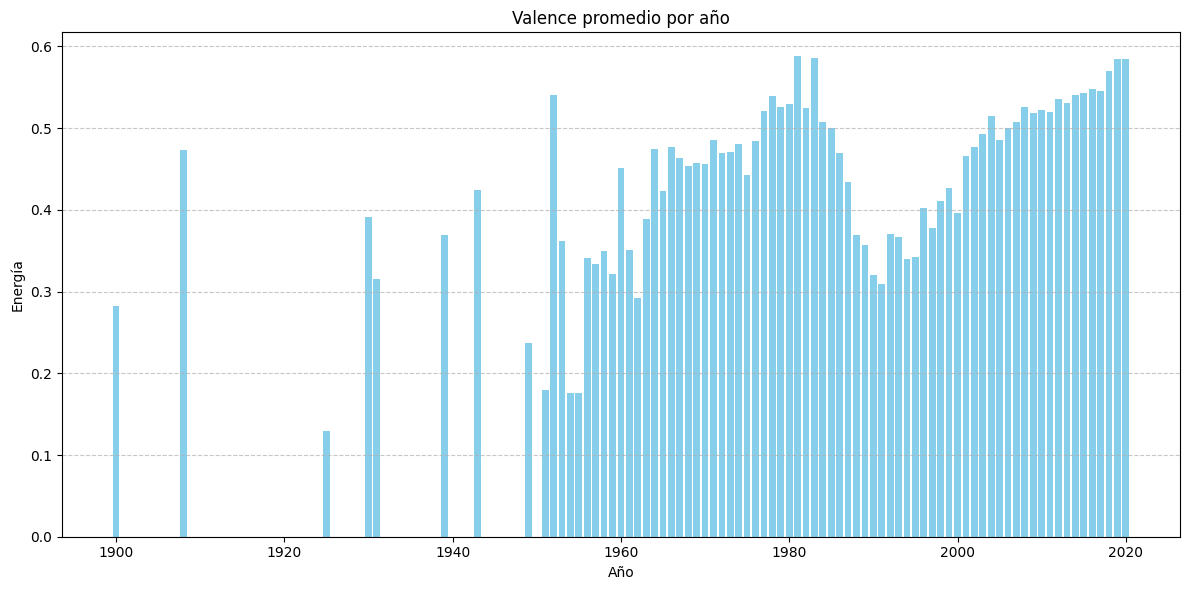

In [24]:
# Graficamos la energía promedio por año
plt.figure(figsize=(12, 6))
plt.bar(energia["year"], energia["energy"], color='skyblue')
plt.title("Valence promedio por año")
plt.xlabel("Año")
plt.ylabel("Energía")
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

¿Cuáles son los meses con más lanzamientos?

In [25]:
# Extraemos el número y nombre del mes de la fecha de lanzamiento
df_filtrado["mes_numero"] = df_filtrado["release_date"].dt.month
df_filtrado["mes_nombre"] = df_filtrado["release_date"].dt.month_name()

In [26]:
# Calculamos la cantidad de canciones lanzadas por mes
lanzamientos = df_filtrado.groupby(["mes_numero", "mes_nombre"]).size().reset_index(name="cantidad")

In [27]:
# Ordenamos los lanzamientos por el número de mes para graficar correctamente
lanzamientos = lanzamientos.sort_values("mes_numero")

In [28]:
# Mostramos el DataFrame con la cantidad de lanzamientos por mes
lanzamientos

,mes_numero,mes_nombre,cantidad
0,1,January,180163
1,2,February,72137
2,3,March,81769
3,4,April,81931
4,5,May,83914
5,6,June,84887
6,7,July,71300
7,8,August,78624
8,9,September,92185
9,10,October,105335


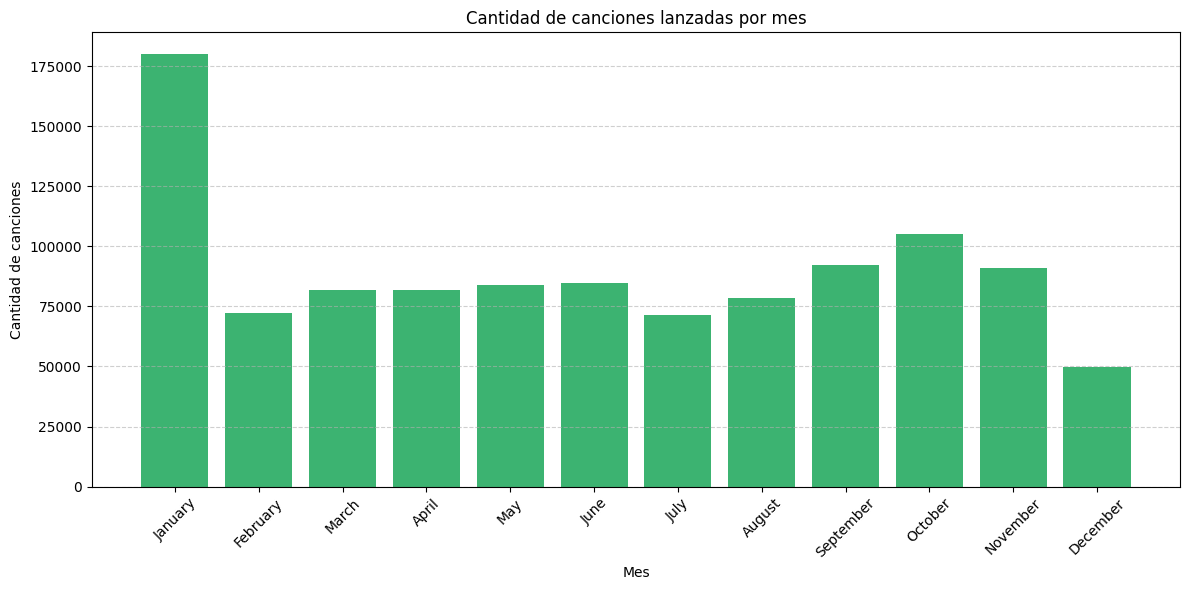

In [29]:
# Graficamos la cantidad de canciones lanzadas por mes
plt.figure(figsize=(12, 6))
plt.bar(lanzamientos["mes_nombre"], lanzamientos["cantidad"], color="mediumseagreen")

plt.title("Cantidad de canciones lanzadas por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de canciones")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [30]:
# Seleccionamos los 3 meses con más lanzamientos de canciones
tres_meses = lanzamientos.nlargest(3, "cantidad")

In [31]:
# Ordenamos los 3 meses de menor a mayor para graficar horizontalmente
tres_meses = tres_meses.sort_values("cantidad", ascending=True)

In [32]:
# Mostramos el DataFrame con los 3 meses con más lanzamientos
tres_meses

,mes_numero,mes_nombre,cantidad
8,9,September,92185
9,10,October,105335
0,1,January,180163


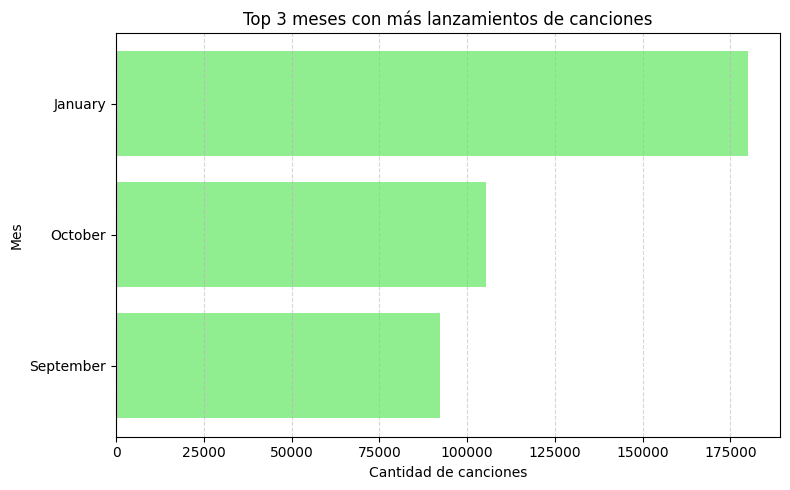

In [33]:
# Graficamos los 3 meses con más lanzamientos de canciones
plt.figure(figsize=(8, 5))
plt.barh(tres_meses["mes_nombre"], tres_meses["cantidad"], color="lightgreen")

plt.title("Top 3 meses con más lanzamientos de canciones")
plt.xlabel("Cantidad de canciones")
plt.ylabel("Mes")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

¿Hay más letras explícitas en la música de hoy?

In [34]:
# Calculamos la cantidad de canciones explícitas por año
explicitas = df_filtrado[df_filtrado["explicit"] == True].groupby("year").size()

In [35]:
# Mostramos la serie de canciones explícitas por año
explicitas

year
1974        1
1978        3
1982        6
1984        3
1985        4
1986       36
1987       46
1988       39
1989       43
1990      136
1991       73
1992      265
1993      282
1994      209
1995      455
1996      508
1997      424
1998      737
1999      815
2000     1049
2001     1006
2002     1066
2003     1014
2004     1194
2005     1677
2006     2046
2007     1611
2008     1731
2009     1915
2010     2218
2011     2420
2012     2297
2013     2769
2014     2530
2015     2935
2016     3192
2017     4543
2018     6133
2019    11249
2020    21488
dtype: int64

In [36]:
# Calculamos el total de canciones por año (explícitas + no explícitas)
total_año = df_filtrado.groupby("year").size()

In [37]:
# Mostramos el total de canciones por año
total_año

year
1900       14
1908       19
1925       16
1930        5
1931       15
        ...  
2016    47055
2017    50981
2018    56085
2019    67263
2020    69714
Length: 78, dtype: int64

In [38]:
# Calculamos el porcentaje de canciones explícitas por año
porcentaje_explicitas = (explicitas / total_año) * 100

In [39]:
# Mostramos el porcentaje de canciones explícitas por año
porcentaje_explicitas

year
1900          NaN
1908          NaN
1925          NaN
1930          NaN
1931          NaN
          ...    
2016     6.783551
2017     8.911163
2018    10.935188
2019    16.723905
2020    30.823077
Length: 78, dtype: float64

In [40]:
# Calculamos la cantidad de canciones no explícitas por año
no_explicitas = total_año - explicitas.fillna(0)

In [41]:
# Creamos el DataFrame combinado de explícitas y no explícitas
df_barras = pd.DataFrame({
    "explícitas": explicitas,
    "no_explícitas": total_año - explicitas.fillna(0)
})

In [42]:
# Limpiamos los NaN si hay
df_barras = df_barras.fillna(0)

In [43]:
# Convertimos a enteros para graficar correctamente
df_barras = df_barras.astype(int)

In [44]:
# Filtramos años a partir de 1990 para mejor visualización
df_barras = df_barras[df_barras.index >= 1990]

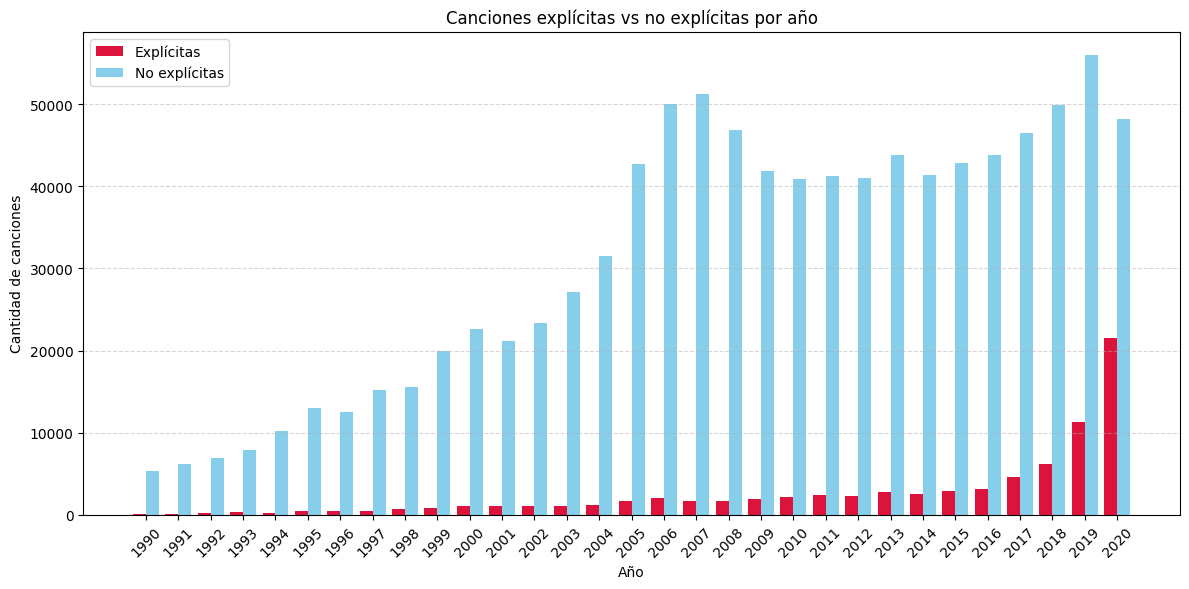

In [45]:
# Graficamos la comparación de canciones explícitas vs no explícitas por año
plt.figure(figsize=(12, 6))

# Creamos el eje x (años)
años = df_barras.index.astype(str)
x = range(len(años))

# Ancho de cada barra
ancho = 0.4

# Dibujamos ambas barras (lado a lado)
plt.bar(x, df_barras["explícitas"], width=ancho, label="Explícitas", color="crimson")
plt.bar([i + ancho for i in x], df_barras["no_explícitas"], width=ancho, label="No explícitas", color="skyblue")

# Ejes y títulos
plt.xticks([i + ancho / 2 for i in x], años, rotation=45)
plt.xlabel("Año")
plt.ylabel("Cantidad de canciones")
plt.title("Canciones explícitas vs no explícitas por año")
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()